# Logistic Regression to diagnose heart conditions

Logistic Regression is a classification algorithm used to assign observations to a discrete set of classes. The model uses sigmoid function to predict the probability of an observation belonging to a certain class. In this notebook, I will use Logistic Regression to diagnose heart conditions based on the Framingham Heart Study dataset available on [Kaggle](https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Importing the dataset
data = pd.read_csv('framingham.csv')
print(data.head())
print(data.info())

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

In [3]:
# drop education column as it is not relevant and only partially filled
data.shape
print(data.head())

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

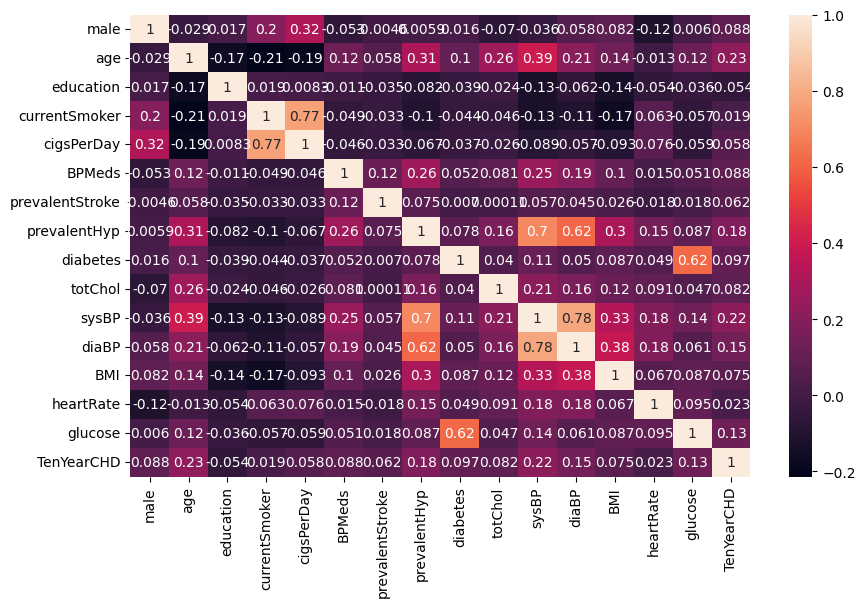

In [4]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [5]:
# checking for missing values
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

From the null values, we can see that the dataset has a lot of missing values.
For `Education`, the data is missing for 105 entries, hence can drop this column.
For `cigsPerDay`, `BPMeds`, `totChol`, `BMI`, `heartRate`, `glucose`, we can replace the missing values with the mean of the column.

In [6]:
# Drop the 'education' column
data.drop(columns=['education'], inplace=True)

# Fill missing values using individual steps
data['cigsPerDay'] = data['cigsPerDay'].fillna(data['cigsPerDay'].mean())
data['BPMeds'] = data['BPMeds'].fillna(0)
data['totChol'] = data['totChol'].fillna(data['totChol'].mean())
data['BMI'] = data['BMI'].fillna(data['BMI'].mean())
data['heartRate'] = data['heartRate'].fillna(data['heartRate'].mean())
data['glucose'] = data['glucose'].fillna(data['glucose'].mean())


In [7]:
print(data.head())
# checking for missing values
data.isnull().sum()

   male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39              0         0.0     0.0                0   
1     0   46              0         0.0     0.0                0   
2     1   48              1        20.0     0.0                0   
3     0   61              1        30.0     0.0                0   
4     0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0  


male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [8]:
# Assign X and y
X_train = data.drop(columns=['TenYearCHD'])
y_train = data['TenYearCHD']

In [9]:
# Shape of X and y
print("Shape of X:", X_train.shape)
print("Shape of y:", y_train.shape)

Shape of X: (4240, 14)
Shape of y: (4240,)


<Figure size 800x600 with 0 Axes>

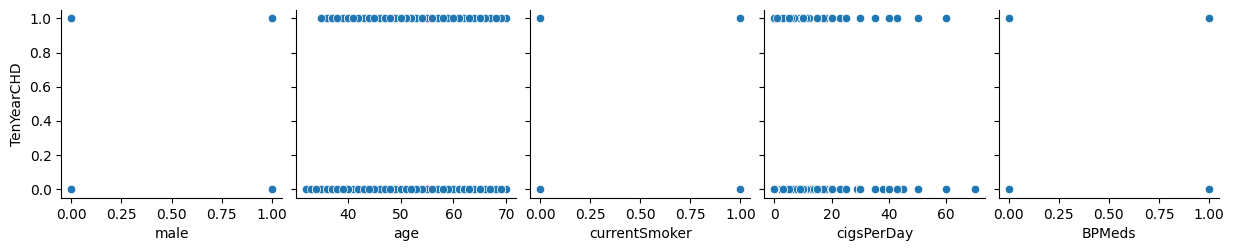

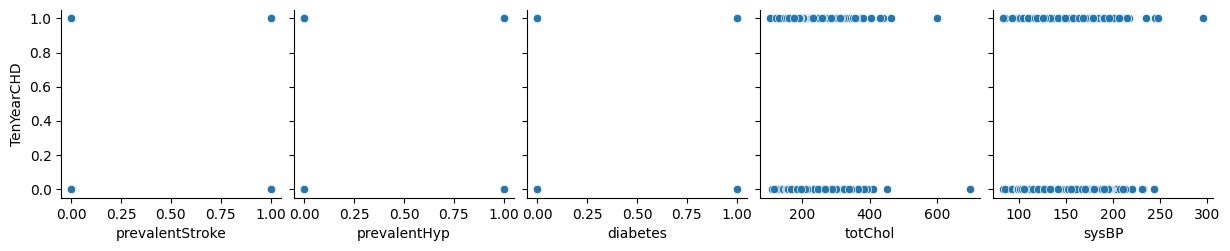

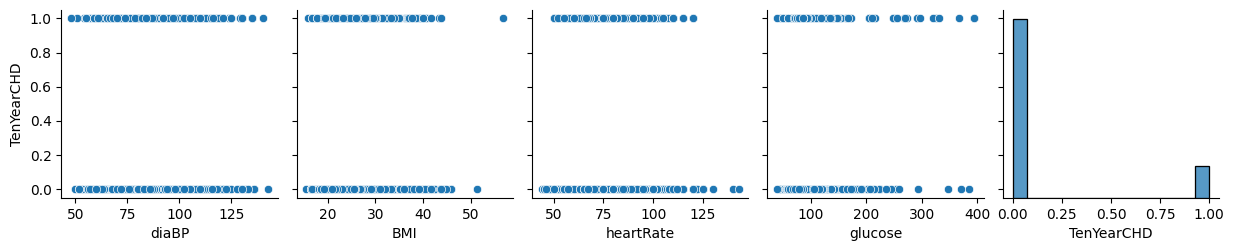

In [10]:
# Visualize the data
plt.figure(figsize=(8,6))
for i in range(0, len(data.columns), 5):
    sns.pairplot(data=data,
                x_vars=data.columns[i:i+5],
                y_vars=['TenYearCHD'])
    
plt.show()

In [11]:
# sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [12]:
# Cost function
def compute_cost(X, y, w, b):
    m = X.shape[0]
    z = np.dot(X, w) + b
    f_w = sigmoid(z)
    y_array = y.values.reshape(-1, 1) # convert to a 2D array
    # Compute the cost
    cost = -y_array * np.log(f_w) - (1 - y_array) * np.log(1 - f_w)
    total_cost = (1 / m) * np.sum(cost)
    return total_cost

In [13]:
# initialize weights and bias
def initialize_weights_and_bias(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

w, b = initialize_weights_and_bias(X_train.shape[1])
# Compute initial cost

init_cost = compute_cost(X_train, y_train, w, b)
print("Initial cost", init_cost)

Initial cost 0.6931471805599453


In [14]:
# Gradient Descent function for logistic regression
def gradient_descent(X, y, w, b, alpha, epochs):
    m = X.shape[0]
    cost_history = []
    for epoch in range(epochs):
        z = np.dot(X, w) + b
        f_w = sigmoid(z)
        y_array = y.values.reshape(-1, 1)
        dz = f_w - y_array
        dw = (1 / m) * np.dot(X.T, dz)
        db = (1 / m) * np.sum(dz)
        w = w - alpha * dw
        b = b - alpha * db
        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)
        if epoch % 100 == 0:
            print("Cost after epoch {}: {}".format(epoch, cost))
    # plot the cost vs epochs
    plt.plot(range(epochs), cost_history)
    plt.xlabel("Epoch")
    plt.ylabel("Cost")
    plt.title("Cost vs Epochs (Logistic Regression with Gradient Descent)")
    plt.grid(True)
    plt.show()
    return w, b

Cost after epoch 0: 0.5616664296561997
Cost after epoch 100: 0.4339613774754078
Cost after epoch 200: 0.4290634429422065
Cost after epoch 300: 0.4256478745866257
Cost after epoch 400: 0.4231972450062586
Cost after epoch 500: 0.4213983572590316
Cost after epoch 600: 0.4200495250516018
Cost after epoch 700: 0.41901780804543043
Cost after epoch 800: 0.41821396527893245
Cost after epoch 900: 0.41757699592381115


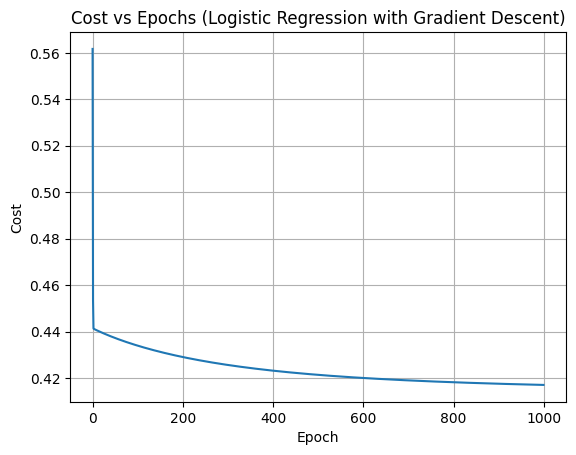

In [15]:
# Gradient descent
w, b = gradient_descent(X_train, y_train, w, b, 0.0001, 1000)

In [16]:
# Predict function
def predict(X, w, b):
    z = np.dot(X, w) + b
    f_w = sigmoid(z)
    y_pred = np.zeros((X.shape[0], 1))
    for i in range(X.shape[0]):
        if f_w[i, 0] > 0.4:
            y_pred[i, 0] = 1
        else:
            y_pred[i, 0] = 0
    return y_pred

# Predictions
y_pred = predict(X_train, w, b)
# Accuracy
accuracy = (1 - np.mean(np.abs(y_pred - y_train.values.reshape(-1, 1)))) * 100

accuracy = round(accuracy, 2)
print("Accuracy: {}%".format(accuracy))

Accuracy: 84.86%
